# 03-1 트랜스포머를 사용한 텍스트 분류

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/hm-dl/blob/main/03-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
# https://colab.research.google.com/gist/SuryanarayanaY/808553205834b3043b619980c9ae3ffc/63362.ipynb
!pip install tensorflow[and-cuda]==2.16.1

import keras
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__, keras.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 958.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 셀프 어텐션

In [2]:
import keras
from keras import layers

def self_attention(inputs, att_dims):
    # (n_batch, n_token, embed_dims) --> (n_batch, n_token, att_dims)
    query = layers.Dense(att_dims)(inputs)
    key = layers.Dense(att_dims)(inputs)
    value = layers.Dense(att_dims)(inputs)
    # score: (n_batch, n_token, n_token)
    key_t = keras.ops.transpose(k, axes=(0, 2, 1))
    query_key_dot = keras.ops.matmul(query, key_t) / keras.ops.sqrt(att_dims)
    score = keras.activations.softmax(query_key_dot)
    # (n_batch, n_token, att_dims)
    return keras.ops.matmul(score, value)

## 멀티 헤드 어텐션

In [3]:
inputs = keras.Input(shape=(10, 15))
x = layers.MultiHeadAttention(num_heads=4, key_dim=20)(query=inputs,
                                                       value=inputs)
model = keras.Model(inputs, x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 10, 15)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 10, 15)         │          5,055 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,055 (19.75 KB)

 Trainable params: 5,055 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

## 위치 인코딩

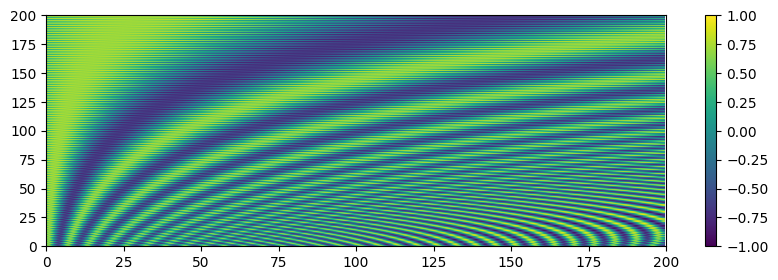

In [4]:
import numpy as np
import matplotlib.pyplot as plt

d = 500
n_token = 200
pos_encoding = np.zeros((d, n_token))
for p in range(n_token):
    for i in range(0, d, 2):
        pos_encoding[i, p] = np.sin(p/10000**(i/d))
        pos_encoding[i+1, p] = np.cos(p/10000**(i/d))
plt.figure(figsize=(10, 3))
plt.imshow(pos_encoding, interpolation="quadric", aspect="auto")
plt.axis([0, n_token, 0, 200])
plt.colorbar()
plt.show()

In [5]:
vocab_size = 10000
embed_dim = 768
max_seq_len = 512

inputs = keras.Input(shape=(None,))
token_embedding = layers.Embedding(vocab_size, embed_dim)(inputs)
token_pos = keras.ops.arange(n_token)
pos_embedding = layers.Embedding(max_seq_len, embed_dim)(token_pos)
encoder_inputs = token_embedding + pos_embedding

## 층 정규화

In [6]:
data = np.arange(12).reshape(2, 2, 3)
print(data)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [7]:
batchnorm = layers.BatchNormalization()
print(batchnorm(data, training=True).numpy())

[[[-1.341581   -1.341581   -1.3415811 ]
  [-0.44719362 -0.44719362 -0.44719374]]

 [[ 0.44719374  0.44719374  0.44719362]
  [ 1.341581    1.341581    1.3415809 ]]]


In [8]:
temp = np.array([0, 3, 6, 9])
(temp - np.mean(temp)) / (np.sqrt(np.var(temp) + 1e-3))

array([-1.34158116, -0.44719372,  0.44719372,  1.34158116])

In [9]:
layernorm = layers.LayerNormalization()
print(layernorm(data).numpy())

[[[-1.2238274  0.         1.2238274]
  [-1.2238274  0.         1.2238274]]

 [[-1.2238274  0.         1.2238274]
  [-1.2238274  0.         1.2238274]]]


In [10]:
temp = np.array([0, 1, 2])
(temp - np.mean(temp)) / (np.sqrt(np.var(temp) + 1e-3))

array([-1.22382734,  0.        ,  1.22382734])

## 트랜스포머 인코더

In [11]:
# x는 토큰 임베딩과 위치 임베딩을 더한 값입니다.
def transformer_encoder(x, padding_mask, dropout):
    residual = x
    key_dim = embed_dim // num_heads
    # 멀티 헤드 어텐션을 통과합니다.
    x = layers.MultiHeadAttention(num_heads, key_dim, dropout=dropout)(
        query=x, value=x, attention_mask=padding_mask)
    x = layers.Dropout(dropout)(x)
    # 스킵 연결
    x = x + residual
    x = layers.LayerNormalization()(x)
    residual = x
    # 위치별 피드 포워드 네트워크
    x = layers.Dense(embed_dim * 4, activation='relu')(x)
    x = layers.Dense(embed_dim)(x)
    x = layers.Dropout(dropout)(x)
    # 스킵 연결
    x = x + residual
    x = layers.LayerNormalization()(x)
    return x

## BERT

In [12]:
!pip install keras-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.4/508.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.5 MB/s eta 0:00:00


In [13]:
import keras_nlp

# BERT 베이스
vocab_size = 28996
num_layers = 12
num_heads = 12
embed_dim = 768
dropout = 0.1
max_seq_len = 512

token_ids = keras.Input(shape=(None,))
segment_ids = keras.Input(shape=(None,))
padding_mask = keras.Input(shape=(None,))

token_embedding = layers.Embedding(vocab_size, embed_dim)(token_ids)
pos_embedding = keras_nlp.layers.PositionEmbedding(max_seq_len)(token_embedding)
seg_embedding = layers.Embedding(2, embed_dim)(segment_ids)

x = layers.Add()((token_embedding, pos_embedding, seg_embedding))
x = layers.LayerNormalization()(x)
x = layers.Dropout(dropout)(x)

for _ in range(num_layers):
    x = transformer_encoder(x, padding_mask, dropout)

outputs = layers.Dense(embed_dim, activation='tanh')(x[:,0,:])
model = keras.Model(inputs=(token_ids, segment_ids, padding_mask),
                    outputs=(outputs))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, None, 768)      │     22,268,928 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ position_embedding        │ (None, None, 768)      │        393,216 │ embedding_2[0][0]      │
│ (PositionEmbedding)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, None, 768)      │          1,536 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, None, 768)      │              0 │ embedding_2[0][0],     │
│                           │                        │                │ position_embedding[0]… │
│                           │                        │                │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, None, 768)      │          1,536 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, None, 768)      │              0 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, None, 768)      │      2,362,368 │ input_layer_4[0][0],   │
│ (MultiHeadAttention)      │                        │                │ dropout_1[0][0],       │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, None, 768)      │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, None, 768)      │              0 │ dropout_3[0][0],       │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, None, 768)      │          1,536 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 3072)     │      2,362,368 │ layer_normalization_2… │
├──────────────────────

 Total params: 108,310,272 (413.17 MB)

 Trainable params: 108,310,272 (413.17 MB)

 Non-trainable params: 0 (0.00 B)

## KerasNLP를 사용한 전이 학습

In [14]:
!gdown 15ZSv_07b3HCKKn08jSDLl4JO4EFy8t-t
!tar -xzf aclImdb_v1.tar.gz
# 비지도 학습에 사용하는 데이터는 삭제합니다.
!rm -r aclImdb/train/unsup

Downloading...
From (original): https://drive.google.com/uc?id=15ZSv_07b3HCKKn08jSDLl4JO4EFy8t-t
From (redirected): https://drive.google.com/uc?id=15ZSv_07b3HCKKn08jSDLl4JO4EFy8t-t&confirm=t&uuid=9ba92910-8e2b-45f5-9fe7-a73df94a4829
To: /content/aclImdb_v1.tar.gz
100% 84.1M/84.1M [00:01<00:00, 79.0MB/s]


In [15]:
train_ds, val_ds = keras.utils.text_dataset_from_directory('aclImdb/train',
                                                           subset='both',
                                                           validation_split=0.2,
                                                           seed=42)
test_ds = keras.utils.text_dataset_from_directory('aclImdb/test')

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [16]:
features, target = train_ds.unbatch().take(1).get_single_element()
print(features.numpy()[:100])
print(target.numpy())

b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell '
0


In [27]:
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    num_classes=2
)

In [28]:
classifier.summary()

Preprocessor: "bert_preprocessor_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,386,178 (16.73 MB)

 Trainable params: 4,386,178 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
classifier.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.5709 - sparse_categorical_accuracy: 0.6911 - val_loss: 0.3547 - val_sparse_categorical_accuracy: 0.8510
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 0.3202 - sparse_categorical_accuracy: 0.8664 - val_loss: 0.3210 - val_sparse_categorical_accuracy: 0.8664
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - loss: 0.2490 - sparse_categorical_accuracy: 0.9023 - val_loss: 0.2952 - val_sparse_categorical_accuracy: 0.8808
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 0.1912 - sparse_categorical_accuracy: 0.9295 - val_loss: 0.3567 - val_sparse_categorical_accuracy: 0.8678
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - loss: 0.1510 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.3266 - val_sparse_categorical_accuracy: 0.8816


In [23]:
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    num_classes=1,
    activation='sigmoid'
)

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
classifier.compile(loss='binary_crossentropy',
                   optimizer=rmsprop,
                   metrics=["accuracy"])
hist = classifier.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 106ms/step - accuracy: 0.6392 - loss: 0.6029 - val_accuracy: 0.8190 - val_loss: 0.4406
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.8179 - loss: 0.4204 - val_accuracy: 0.8364 - val_loss: 0.3694
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.8514 - loss: 0.3666 - val_accuracy: 0.8460 - val_loss: 0.3500
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.8696 - loss: 0.3262 - val_accuracy: 0.8032 - val_loss: 0.4396
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.8885 - loss: 0.2837 - val_accuracy: 0.8790 - val_loss: 0.3040
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9033 - loss: 0.2535 - val_accuracy: 0.8794 - val_loss: 0.3381
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 77ms/step - accuracy: 0.9180 - loss: 0.2187 - val_accuracy: 0.8572 - val_loss: 0.3551
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9297 - loss: 0.19

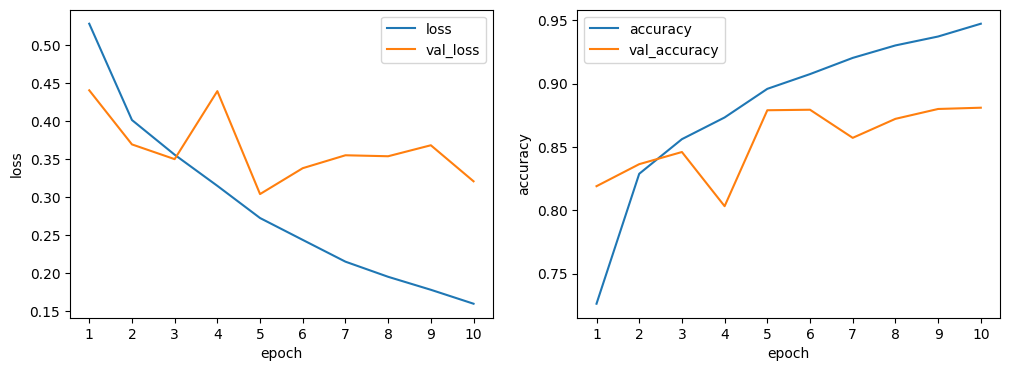

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(range(1, 11), hist.history['loss'], label='loss')
axs[0].plot(range(1, 11), hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(range(1, 11))
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[1].plot(range(1, 11), hist.history['accuracy'], label='accuracy')
axs[1].plot(range(1, 11), hist.history['val_accuracy'], label='val_accuracy')
axs[1].set_xticks(range(1, 11))
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
plt.show()

In [ ]:
classifier.preprocessor(train_ds.batch(32))

{'token_ids': <tf.Tensor: shape=(2, 512), dtype=int32, numpy=
 array([[ 101, 1109, 3613, ...,    0,    0,    0],
        [ 101,  146, 9424, ...,    0,    0,    0]], dtype=int32)>,
 'segment_ids': <tf.Tensor: shape=(2, 512), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'padding_mask': <tf.Tensor: shape=(2, 512), dtype=bool, numpy=
 array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])>}

In [ ]:
classifier.preprocessor(features)['token_ids'].numpy()[0, :100]

array([  101,  1109,  3613,  3058, 17594,  4874,   119,   102,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [ ]:
classifier.preprocessor(features)['padding_mask'].numpy()[0, :100]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
classifier.preprocessor(features)['segment_ids'].numpy()[0, :100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)